<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/scraping_http_avanzado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Encontrando APIs ocultas

Cuando una compañia desarrolla un sitio web muchas veces separa lo que se dice el _frontend_, que es la parte visible del sitio y la cual se ejecuta en tu navegador, del _backend_, la parte del sitio que realiza el computo mas pesado y se ejecuta en servidores/computadoras de la compañia.

Para comunicar el _backend_ con el _frontend_ una forma popular es desarrollar REST APIs, a veces estas son públicas pero a veces están ocultas y las utilizamos sin darnos cuenta cuando interactuamos con un sitio web.

Ejemplo de un sitio web y su API: http://numbersapi.com/

Hoy veremos como encontrarlas y utilizarlas para extraer datos de forma cómoda

## Ejemplo 1: Precio del dólar

Para este primer ejemplo veremos como encontrar una API oculta en https://www.ambito.com/.

Luego veremos como utilizarla de 3 maneras:
1. Desde el navegador
2. Con cURL (Un programa de linea de comandos para transferir datos de internet)
3. Con Python

### Método utilizando python
1. Entramos al sitio: https://www.ambito.com/contenidos/dolar-informal.html
2. Vamos a _Inspeccionar_ ( ctrl+shift+i )
3. Vamos a la solapa _Network_ y seleccionamos XHR (El tipo de paquete que utilizan las APIs)
4. Recargamos el sitio y nos ponemos a revisar el _Response_ de cada paquete hasta encontrar cual contiene la información que buscamos
5. Copiamos el comando cURL necesario para consultarla
6. Utilizamos [curl.trillworks.com](https://curl.trillworks.com) para armar el request con código python y queda algo así

https://curl.se/


https://curlconverter.com/


In [2]:
import requests

headers = {
    'authority': 'mercados.ambito.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9,es-US;q=0.8,es;q=0.7',
    'origin': 'https://www.ambito.com',
    'referer': 'https://www.ambito.com/',
    'sec-ch-ua': '".Not/A)Brand";v="99", "Google Chrome";v="103", "Chromium";v="103"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
}

response = requests.get('https://mercados.ambito.com//dolar/informal/grafico/semanal', headers=headers)

# Si los datos son provistos en formato JSON podemos utilizar el metodo .json() para acceder a ellos.
# Check for a successful response before trying to decode JSON
if response.status_code == 200:
    data = response.json()
    print(data)  # Or do something else with the data
else:
    print(f"Request failed with status code: {response.status_code}")
    print(response.text)  # Print the response content for debugging

[['fecha', 'Dólar Informal'], ['18/02/2025', 1235], ['18/02/2025', 1235], ['19/02/2025', 1235], ['20/02/2025', 1225], ['21/02/2025', 1225], ['24/02/2025', 1230], ['24/02/2025', 1230], ['25/02/2025', 1240], ['25/02/2025', 1240]]


In [1]:
import requests

response = requests.get('https://mercados.ambito.com//dolar/informal/grafico/semanal')

# Si los datos son provistos en formato JSON podemos utilizar el metodo .json() para acceder a ellos.
response.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Mejorando el código

Analizando la API se puede ver que tiene al menos un parámetro modificables, el periodo.

Podemos poner todo dentro de una función que extraiga los precios del dolar para un perioro determinado. De esta forma será más facil de usar y no necesitemos repetir el código.

In [3]:
import requests

def obtener_valor_dolar_blue(periodo):
  """Devuelve valor del dólar blue obteniéndolo de la API oculta de ambito.com

  periodo (str) -> Puede ser semana, mensual o anual.
  """
  headers = {
      'authority': 'mercados.ambito.com',
      'accept': '*/*',
      'accept-language': 'en-US,en;q=0.9,es-US;q=0.8,es;q=0.7',
      'origin': 'https://www.ambito.com',
      'referer': 'https://www.ambito.com/',
      'sec-ch-ua': '".Not/A)Brand";v="99", "Google Chrome";v="103", "Chromium";v="103"',
      'sec-ch-ua-mobile': '?0',
      'sec-ch-ua-platform': '"Linux"',
      'sec-fetch-dest': 'empty',
      'sec-fetch-mode': 'cors',
      'sec-fetch-site': 'same-site',
      'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
  }

  response = requests.get(f'https://mercados.ambito.com//dolar/informal/grafico/{periodo}', headers=headers)

  return response.json()

data = obtener_valor_dolar_blue('mensual')

In [4]:
# Cargo datos en un DataFrame y grafico
import pandas as pd
import plotly.express as px

df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df[1:]

display(df.head(3))

fig = px.line(df, x='fecha', y='Dólar Informal')
fig.show()

,fecha,Dólar Informal
1,27/01/2025,1230
2,28/01/2025,1230
3,30/01/2025,1220


## Ejercicio de Estación Meteorológica

Conseguir los datos de la altura del río de las últimas 12 horas de la estación meteorológica Palermo: https://www.aysa.com.ar/Que-Hacemos/estaciones-meteorologicas/datos#

In [5]:
import requests

response = requests.get('https://www.aysa.com.ar/api/estaciones/getVariablesEstacionesHistorico/82E52984-F07F-4F84-9E6B-17E7F85D7478', verify=False).json()
niveles_rio = [float(nivel) for nivel in response["variables"]["NivelRio"]]

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'www.aysa.com.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



#### Usemos lo hecho para calcular las frecuencia de cada hashtag

In [6]:
import pandas as pd

data = pd.DataFrame(niveles_rio,columns=["Niveles del rio (metros)"])
data.head()

,Niveles del rio (metros)
0,0.72
1,0.67
2,0.62
3,0.63
4,0.85


<Axes: >

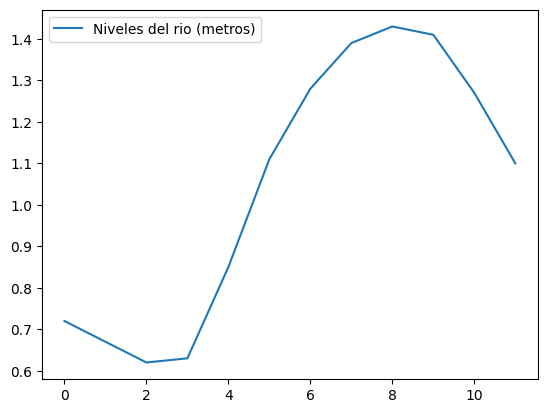

In [7]:
data.plot()

# Herramientas útiles
- [curl2python](https://curl.trillworks.com/)
- [Visualizador de JSONs](http://jsonviewer.stack.hu/)

# Recursos útiles
- [Tutorial de Indian Pythonista sobre APIs ocultas](https://www.youtube.com/watch?v=twuhocLtGCg)